In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from mpl_finance import candlestick2_ohlc, candlestick_ohlc
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
codeList = ['A005930', 'A000660', 'A068270', 'A207940', 'A005380', 'A005490',\
            'A051910', 'A035420', 'A028260', 'A012330', 'A017670', 'A105560',\
            'A055550', 'A015760', 'A051900', 'A018260', 'A034730', 'A032830',\
            'A096770', 'A006400', 'A145020', 'A051370', 'A037460', 'A088800']
stName = ['삼성전자', 'SK하이닉스', '셀트리온', '삼성바이오로직스', '현대차', 'POSCO',\
          'LG화학', 'NAVER', '삼성물산', '현대모비스', 'SK텔레콤', 'KB금융', \
          '신한지주', '한국전력', 'LG생활건강', '삼성에스디에스', 'SK', '삼성생명',\
          'SK이노베이션', '삼성SDI', '휴젤', '인터플렉스', '삼지전자', '에이스테크']
Name2Code = {nm:code for nm, code in zip(stName, codeList)}
print(Name2Code)

{'SK': 'A034730', '인터플렉스': 'A051370', '삼성전자': 'A005930', 'POSCO': 'A005490', '현대모비스': 'A012330', '에이스테크': 'A088800', 'SK이노베이션': 'A096770', '삼성생명': 'A032830', '셀트리온': 'A068270', '삼성물산': 'A028260', '삼성SDI': 'A006400', 'KB금융': 'A105560', 'NAVER': 'A035420', '신한지주': 'A055550', 'SK하이닉스': 'A000660', '현대차': 'A005380', '한국전력': 'A015760', 'SK텔레콤': 'A017670', '삼성바이오로직스': 'A207940', '삼성에스디에스': 'A018260', 'LG화학': 'A051910', '삼지전자': 'A037460', '휴젤': 'A145020', 'LG생활건강': 'A051900'}


##■지지 / 저항선 그리기. 자동화
 . ohlc 가격 중 가장 많이 겹치는 가격을 추출. 빈도수가 가장 높은 상위 n개의 가격을 선으로 표시

In [4]:
# 가장 많이 겹치는 가격대 추출
def set_support_resist(close):
    '''
    값의 출현빈도수에 따라 내림차순 정렬
    :param close: Nx4 numpy array. column이 ohlc순으로 정렬된 numpy array  
    :return: 내림차순으로 정렬한 값 반환
    '''
    # 출현된 값 추출
    unique_val = np.unique(close)
    # 각 값의 출현빈도 count / array로 순서대로 저장
    freq_val = np.array([])
    for num in unique_val:
        freq_val = np.append(freq_val, close[close == num].count().sum())
    # 출현빈도를 키값으로 내림차순된 index 연산
    ind = np.lexsort((unique_val, freq_val))
    return unique_val[ind] # index순서대로 값 반환

In [9]:
close = pd.read_hdf('./daily_stock_price.h5', Name2Code["SK하이닉스"])
close.head(5)

date   open   high    low  close      vol     marketValue
date                                                                     
2016-08-22  20160822  35500  36050  35250  36000  4149396  26208072000000
2016-08-23  20160823  36250  36300  35550  35600  3014421  25916871000000
2016-08-24  20160824  35900  35950  35300  35750  1689924  26026071000000
2016-08-25  20160825  35100  35750  34900  35700  1568516  25989671000000
2016-08-26  20160826  35850  36350  35750  36250  2635343  26390072000000

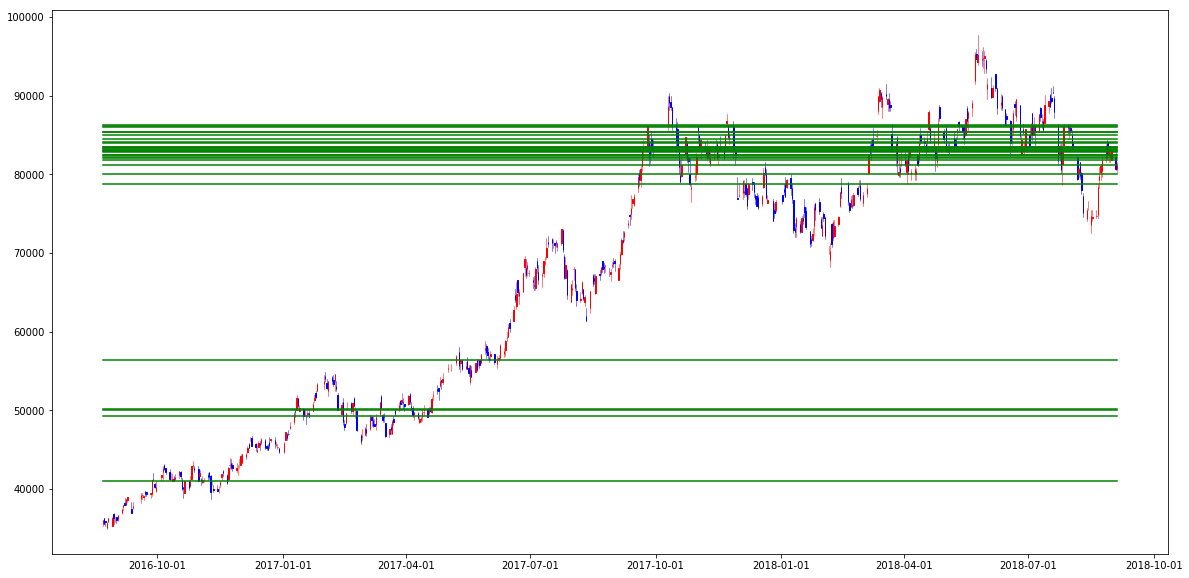

In [12]:
# 지지 / 저항선 n개 겹쳐 그리기 
num = 30

f1, ax = plt.subplots(1,1,figsize = (20,10))

close['date'] = close.index.map(mdates.date2num)
candlestick_ohlc(ax, close.loc[:, ['date', 'open','high','low','close']].values, colorup='red',colordown='blue', width=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

val = set_support_resist(close.loc[:,['open','high','low','close']])

for v in val[-num:]:
    ax.plot(close.index, v*np.ones_like(close['close']), label = 'moment_idx', color='g')